

# ML Tutorial Session 6


# Introduction

In this notebook, we'll study **decision trees**. Why?
1. They form the basis for some of the most powerful methods in all of machine learning
2. They produce highly interpretable models, which is useful in contexts where you need high explainability (law, finance, medicine, and much more).

## Overview

-  What are Decision trees? , and how they can be trained (or "grown") ?

-  Attribute Selection methods.

- We'll also see that they can produce highly complex decision boundaries when used for classification, which makes them capable of fitting very complicated training data sets.

- We'll also see that they often tend to overfit.

<img src="https://drive.google.com/uc?export=view&id=15J26UGcp4jrYWSFAwOTDXiIvkuWHty5r">

## Decision trees Terminology:

 **Root Node**

- It represents the entire population or sample. This further gets divided into two or more homogeneous sets.


 **Splitting**

- It is a process of dividing a node into two or more sub-nodes.


**Decision Node**

- When a sub-node splits into further sub-nodes, then it is called a decision node.


**Leaf/Terminal Node**

- Nodes that do not split are called Leaf or Terminal nodes.


**Pruning**

- When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.


**Branch/Sub-Tree**

- A sub-section of an entire tree is called a branch or sub-tree.


**Parent and Child Node**

- A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

# Setup

In [1]:
# HIDE CODE

# Python setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mutual_info_score


from ipywidgets import interactive
from ipywidgets import interact, IntSlider

In [2]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

# Decision Trees

We use the popular iris dataset. The data is already included in scikit-learn and consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)

In [3]:
# load data
iris = load_iris()

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.



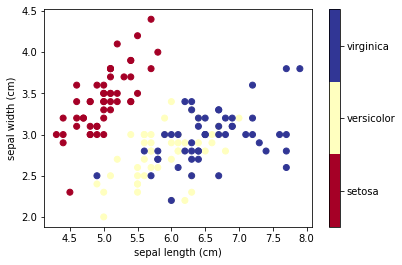

In [4]:
# HIDE CODE
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

We notice that setosa instances tend to have lower sepal length and higher sepal width.

To decide which class an instance falls in to, we could therefore make a set of rules saying things like

- "If your sepal length is < 6  and sepal width is above 2.8, predict as setosa."
- "If your sepal length is > 5

    a. sepal width is < 3.5 ans sepal length < 7 , predict as versicolor
    and so on..."


> Such a set of rules is precisely a **decision tree**.

---



Let's use scikit-learn to make the rules and the tree for us:

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
X = iris.data
y = iris.target


In [7]:
clf = DecisionTreeClassifier( criterion="entropy", random_state=seed).fit(X, y)

In [8]:
import sys
!{sys.executable} -m pip install graphviz
from graphviz import Source

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from IPython.display import display
from IPython.display import SVG

In [10]:
from sklearn.tree import export_graphviz

In [11]:
graph = Source(export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names,
                              filled = True, rounded=True))

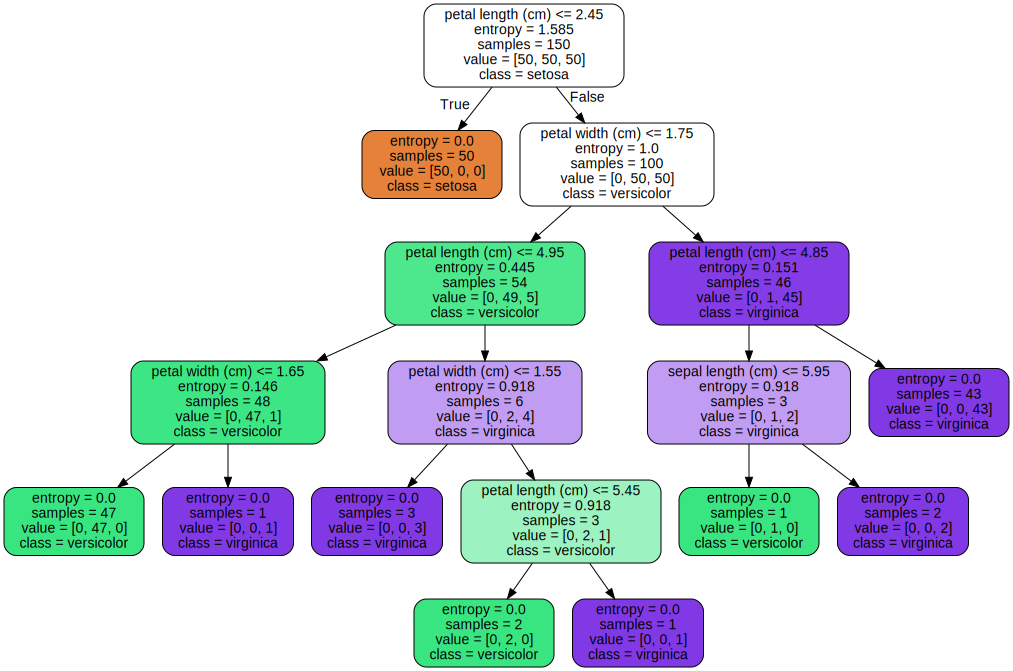

In [12]:
# The following requires graphviz on your computer
display(SVG(graph.pipe(format='svg')))

Now that we have seen how decision tree is look like, let us learn how to build the decision trees.

**Decision Tree algorithm intuition**





The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

There are several algorithms like CART, ID3, C4.5 etc.


# Attribute Selection Measures

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

- **Information gain**
- **Gini index**

While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


**Information gain**

By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**.

## Entropy

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-

<img src="http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png">

Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

<img src="https://drive.google.com/uc?export=view&id=1d5uP4sbldnZr0haM0zZ6ar-G5R_sctGG">

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.


## Gini index



Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points.


Gini index can be represented with the following diagram:-


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s">


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure ($p^2+q^2$).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

# Splitting the node

Lets see the case of Information gain at root level to decide which attribute to select from sepal length, sepal width, petal length, petal width and what is the value the attribute must compared to make decision?

Process:
1. At each node, for every attribute(columns), Iterates over unique feature values to find the best split
2. Calculates a potential split value as the average of adjacent unique feature values.
3. Creates boolean masks for the left and right subsets based on the potential split value.
4. Filters the data into left and right subsets(children).
5. Calculates the entropies of the left and right subsets based on the target column.
6. Calculates the weight (proportion) of each subset relative to the entire dataset.
7. Computes the weighted average entropy for the split.
8. Calculates information gain as the difference between the total entropy and the split entropy.
9. Updates the best split value and maximum information gain if a better split is found.

**Notation**:
We will be labelling the nodes level-wise, starting with 0.
So root node will be Node 0, it's left child is node 1, right child is node 2 and so on..

In [13]:
import numpy as np
from scipy.stats import entropy
from sklearn.datasets import load_iris

def calculate_information_gain(X, y, feature_index, target_column):
    """
    Calculate information gain for a specific feature in a dataset.

    Parameters:
        - data: A numpy array containing the data with features and a target column.
        - feature_index: The index of the feature for which to calculate information gain.
        - target_column: The index of the target column (class labels).

    Returns:
        - Information gain for the specified feature.
    """
    # Extract the feature and target columns
    feature_values = X[:, feature_index]
    target_values = y

    # Calculate the entropy of the entire dataset
    total_entropy = entropy(np.bincount(target_values)/np.sum(target_values), base=2)
    print("Entropy is:", total_entropy)
    # Initialize variables to store the best split value and maximum information gain
    best_split_value = None
    max_information_gain = 0.0

    unique_feature_values = np.unique(feature_values)

    for i in range(len(unique_feature_values)-1):
        # Calculate the potential split value as the average of adjacent unique values
        split_value = (unique_feature_values[i] + unique_feature_values[i + 1]) / 2
        # Split the data based on the current split value
        left_mask = feature_values <= split_value
        right_mask = feature_values > split_value
        left_subset = X[left_mask]
        right_subset = y[right_mask]

        subset_target_left = target_values[left_mask]
        subset_target_right = target_values[right_mask]

        # Calculate the entropies of the left and right subsets based on the target column
        left_entropy = entropy(np.bincount(subset_target_left)/ len(subset_target_left), base=2)
        right_entropy = entropy(np.bincount(subset_target_right)/ len(subset_target_right), base=2)

        # Calculate the weight (proportion) of each subset
        left_weight = len(left_subset) / len(target_values)
        right_weight = len(right_subset) / len(target_values)

        # Calculate the weighted average entropy for the split
        split_entropy = left_weight * left_entropy + right_weight * right_entropy

        # Calculate information gain for the split
        information_gain = total_entropy - split_entropy

        # Update the best split value and maximum information gain if needed
        if information_gain > max_information_gain:
            max_information_gain = information_gain
            best_split_value = split_value

    return max_information_gain, best_split_value


**For Node 0 (Root Node)**

for root node, let use see what is information gain with respect to all attributes and what is best split value of that atribute.

In [14]:
for i in range(4):

  # Specify the index of the feature you want to calculate information gain for
  feature_index = i  # Replace with the desired feature index

  # Specify the target column as iris.target
  target_column = iris.target

  # Calculate information gain for the specified feature and get the best split value
  info_gain, best_split_value = calculate_information_gain(iris.data, iris.target , feature_index, target_column)
  print("Information Gain for Feature", iris.feature_names[feature_index], ":", info_gain)
  print("Best Split Value:", best_split_value)

Entropy is: 1.584962500721156
Information Gain for Feature sepal length (cm) : 0.5572326878069265
Best Split Value: 5.55
Entropy is: 1.584962500721156
Information Gain for Feature sepal width (cm) : 0.28312598916883136
Best Split Value: 3.3499999999999996
Entropy is: 1.584962500721156
Information Gain for Feature petal length (cm) : 0.9182958340544894
Best Split Value: 2.45
Entropy is: 1.584962500721156
Information Gain for Feature petal width (cm) : 0.9182958340544894
Best Split Value: 0.8


As we can see by selection of petal length as attribute for split we get the highest information gain. so we proceed with petal length to split the node and the value of best split occurs at 2.45.
So the split happens like for data where petal length is <= 2.45 will go for the left child and whose petal length is > 2.45 goes to right child.

If we observe the left child, it is a pure leaf node as it contains data entirely belonging to one single class and thus have entropy as 0

**For Node 2**

In [15]:
mask = X[:, 2] > 2.45

for i in range(4):

  # Specify the index of the feature you want to calculate information gain for
  feature_index = i  # Replace with the desired feature index

  # Specify the target column as iris.target
  target_column = iris.target

  # Calculate information gain for the specified feature and get the best split value
  info_gain, best_split_value = calculate_information_gain(iris.data[mask], iris.target[mask], feature_index, target_column)
  print("Information Gain for Feature", iris.feature_names[feature_index], ":", info_gain)
  print("Best Split Value:", best_split_value)



Entropy is: 1.0
Information Gain for Feature sepal length (cm) : 0.16049997364457846
Best Split Value: 6.15
Entropy is: 1.0
Information Gain for Feature sepal width (cm) : 0.05823679945423099
Best Split Value: 2.45
Entropy is: 1.0
Information Gain for Feature petal length (cm) : 0.6573737500732157
Best Split Value: 4.75
Entropy is: 1.0
Information Gain for Feature petal width (cm) : 0.6901603707546748
Best Split Value: 1.75


Applying again the same case to node 2, the information gain is highest when petal width attribute is selected and the best spllit value for that attribute is 1.75, so that node is split into 2 children where one has petal width <= 1.75 and other > 1.75

and the process is repeated untill we get pure-leaf nodes(with entropy 0).

Similarly you can extend this to any internal node( non-leaf node).

# Decision Boundaries

We have seen how to construct the decision tree, now we will try to visualize how does the decision boundary exists for decision trees.

To make observation easy first, let us try with 2 features and see how decision boundaries look after classifier is being trained.(We will do it pair-wise).

/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_17974/1804797290.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


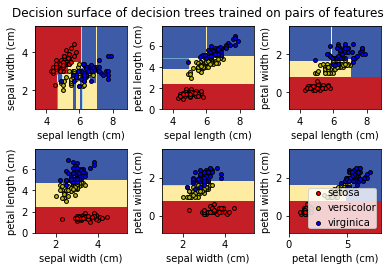

In [16]:

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight");

Next, we display the structure of a single decision tree trained on all the features together

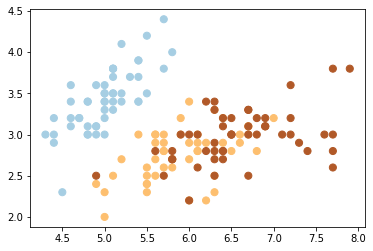

In [17]:
X = iris.data
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

In [18]:

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None):

    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.clim(y.min(), y.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.clim(y.min(), y.max())

    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_

        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-r')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)

        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-r')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])

    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

We use a custom function which generates a (static) plot of a decision tree classifier with specified parameters.

In [19]:
# use 2 features
X = iris.data[:,:2]
y = iris.target

def interactive_tree(depth=1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)
    plt.show()

interactive(interactive_tree, depth=(1, 15))

interactive(children=(IntSlider(value=1, description='depth', max=15, min=1), Output()), _dom_classes=('widget…

**Note:** The decision boundaries of decision trees are always parallel to an axis. Why is that? It's because each node in a decision tree consists of a test using only **one feature at a time**.

# Overfitting

One issue with decision trees is that it is very easy to create trees which overfit the data. As an example, we will use a random sample of 50% of the iris data to train the model and display the results:

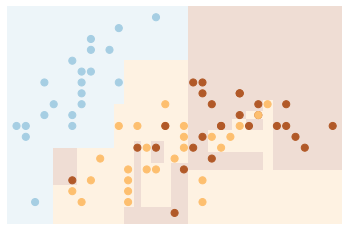

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

clf_1 = DecisionTreeClassifier()

visualize_tree(clf_1, X_train, y_train, boundaries=False)

Next, we use a different sample (we simply need to change the random state) to fit another tree:



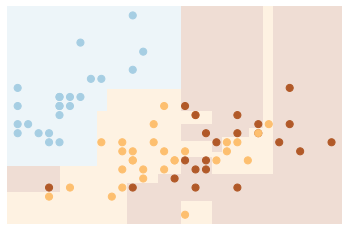

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=123)

clf_2 = DecisionTreeClassifier()

visualize_tree(clf_2, X_train, y_train, boundaries=False)

Two approaches which can be used to avoid overfitting are as follows:-

- Pre-Pruning

- Post-Pruning


## **Pre-Pruning**

In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a threshold value. But it is difficult to choose an appropriate stopping point.


## **Post-Pruning**

In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should be converted to a leaf node.

Note that the details of the classifications are very different, which is an indication of overfitting:

when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.